In [22]:
import geopandas as gpd
import geodatasets
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

<Axes: >

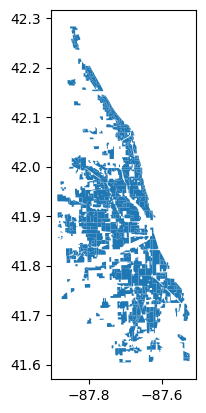

In [7]:
redlining_df = gpd.read_file("../data/ILChicago1940.zip")
redlining_df.plot()

In [34]:
redlining_df

,name,holc_id,holc_grade,geometry
0,NaN,A1,A,"POLYGON ((-87.83054 42.25361, -87.83185 42.255..."
1,NaN,A10,A,"POLYGON ((-87.76217 42.12934, -87.76209 42.128..."
2,NaN,A11,A,"POLYGON ((-87.75082 42.13867, -87.75284 42.140..."
3,NaN,A12,A,"POLYGON ((-87.74436 42.12695, -87.74617 42.129..."
4,NaN,A13,A,"POLYGON ((-87.75566 42.12410, -87.75356 42.123..."
...,...,...,...,...
575,NaN,D95,D,"POLYGON ((-87.64331 41.72133, -87.64355 41.726..."
576,NaN,D96,D,"POLYGON ((-87.62412 41.72921, -87.62409 41.722..."
577,NaN,D97,D,"POLYGON ((-87.61953 41.72961, -87.61821 41.729..."
578,NaN,D98,D,"MULTIPOLYGON (((-87.58543 41.72948, -87.58533 ..."


<Axes: >

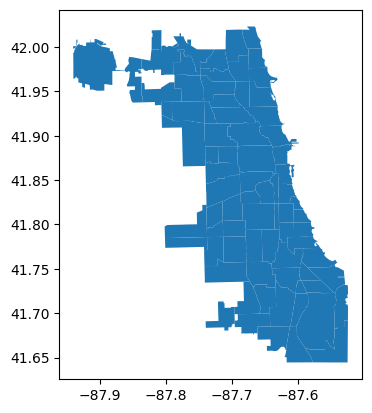

In [19]:
chicago_neighborhoods_df = gpd.read_file(geodatasets.get_path("geoda.chicago_commpop"))
chicago_neighborhoods_df.plot()

In [26]:
chicago_neighborhoods_df

,community,NID,POP2010,POP2000,POPCH,POPPERCH,popplus,popneg,geometry
0,DOUGLAS,35,18238,26470,-8232,-31.099358,0,1,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ..."
1,OAKLAND,36,5918,6110,-192,-3.142390,0,1,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ..."
2,FULLER PARK,37,2876,3420,-544,-15.906433,0,1,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ..."
3,GRAND BOULEVARD,38,21929,28006,-6077,-21.698922,0,1,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ..."
4,KENWOOD,39,17841,18363,-522,-2.842673,0,1,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ..."
...,...,...,...,...,...,...,...,...,...
72,MOUNT GREENWOOD,74,19093,18820,273,1.450584,1,0,"MULTIPOLYGON (((-87.69646 41.70714, -87.69644 ..."
73,MORGAN PARK,75,22544,25226,-2682,-10.631888,0,1,"MULTIPOLYGON (((-87.64215 41.68508, -87.64249 ..."
74,OHARE,76,12756,11956,800,6.691201,1,0,"MULTIPOLYGON (((-87.83658 41.98640, -87.83658 ..."
75,EDGEWATER,77,56521,62198,-5677,-9.127303,0,1,"MULTIPOLYGON (((-87.65456 41.99817, -87.65456 ..."


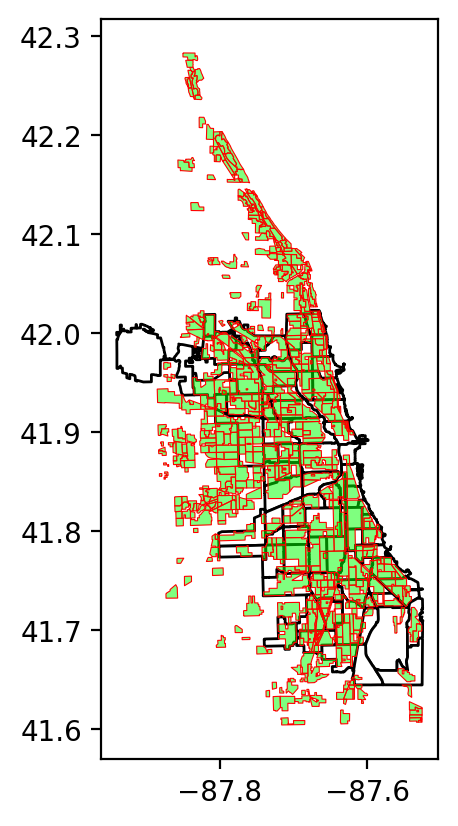

In [43]:
fig, ax = plt.subplots()
chicago_neighborhoods_df.plot(ax=ax, facecolor=(1,0,0,1), color='white', edgecolor='black')
redlining_df.boundary.plot(ax=ax, facecolor=(0, 1, 0, .5), color='red', lw=.4)
fig.set_dpi(200)
plt.show()

# connect to postgres and income data

In [64]:
import psycopg2
import csv

In [78]:
pg_conn = psycopg2.connect(
        dbname="postgres",
        user="postgres",
        password="password?",
        host="localhost",
        port="5432"
    )
pg_cursor = pg_conn.cursor()

In [79]:
# must run previous cell to establish connection


# export dataframes to csv file and import to Postgres 
create_table = '''
    CREATE TABLE IF NOT EXISTS communitystats(
    CommunityAreaNumber VARCHAR PRIMARY KEY,
    CommunityAreaName VARCHAR(255),
    PercentHousingCrowded DECIMAL(4, 1),
    PercentHouseholdsBelowPoverty DECIMAL(4, 1),
    PercentAged16PlusUnemployed DECIMAL(4, 1),
    PercentAged25PlusNoHighSchoolDiploma DECIMAL(4, 1),
    PercentAgedUnder18OrOver64 DECIMAL(4, 1),
    PerCapitaIncome VARCHAR,
    HardshipIndex VARCHAR
    );
    '''
pg_cursor.execute(create_table)


# Import the CSV data into the table
with open('Per_Capita_Income.csv', 'r', encoding='utf-8-sig') as file:
    next(file)
    pg_cursor.copy_from(file, 'communitystats', sep=',')
    
    
    
# Close the PostgreSQL cursor and connection
if pg_cursor is not None:
    pg_cursor.close()
if pg_conn is not None:
    pg_conn.close()